# Simulation en biologie
**Lundi 24/09** - Bruno Toupance

## Exercice 2

Le but de cet exercice est de trouver numériquement la valeur de l'intégrale de la fonction g. La fonction g est définie par :

In [1]:
# g function
g <- function(x){
    return( (exp(x)-1) / (exp(1)-1) )
}

Et voici une représentation de g sur l'intervalle [0; 2]

In [2]:
# Values to evaluate g
valX <- seq(from=0, to=2, len=1000)
valY = g(valX)

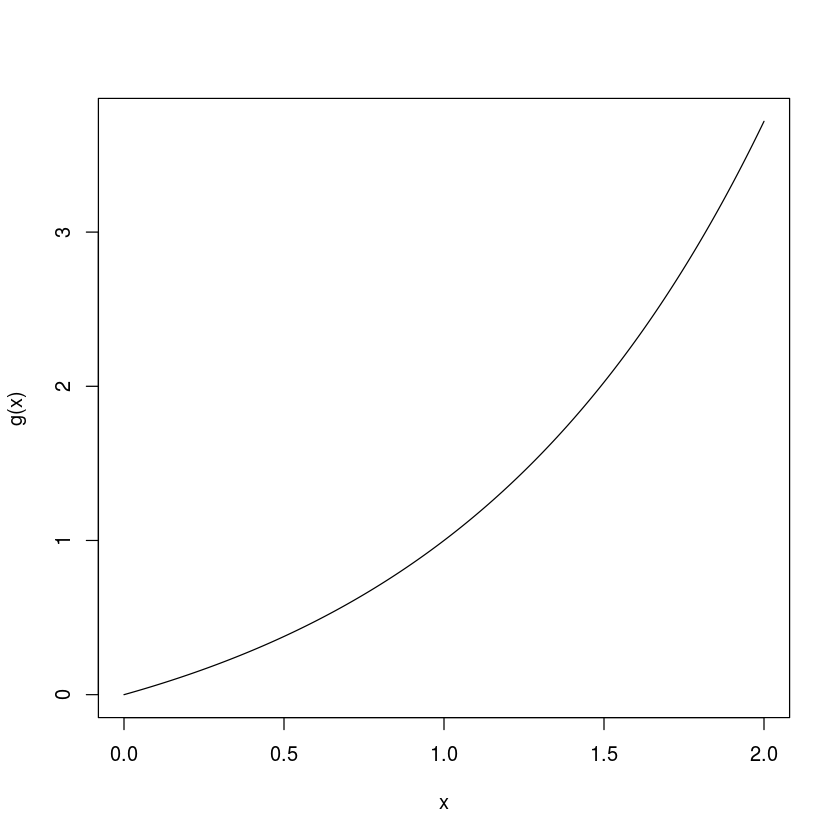

In [3]:
# plot of g
plot(valX, valY, xlab='x', ylab='g(x)', type='l')

Analytiquement, on peut trouver la valeur exacte de l'integrale de g sur [0; 2]. La fonction `integrate` de R donne également une très bonne approximation.

**Preuve :**  
$$g(x) = \frac{exp(x)-1}{exp(1)-1}$$
On intègre g entre 0 et 2
$$I = \int_{0}^{2}g(u)du$$
$$I = \int_{0}^{2}\frac{exp(u)-1}{exp(1)-1}du$$
Par linéarité de l'intégrale :
$$I = \frac{1}{exp(1)-1} \int_{0}^{2}exp(u)-1du$$
$$I = \frac{1}{exp(1)-1} [exp(u)-u]_{0}^{2}$$
$$I = \frac{1}{exp(1)-1}(exp(2)-2-exp(0)+0)$$
On obtient finalement :
$$I = \frac{exp(2)-3}{exp(1)-1}$$

In [28]:
# Valeur à trouver de l'intégration
# fonction integrate
integrate(g, lower = 0, upper = 2)
# valeur exacte
Iexact = (exp(2)-3)/(exp(1)-1)
Iexact

2.554328 with absolute error < 2.8e-14

[1] 2.554328

In [29]:
# 2 : MC par tirage noir ou blanc
n = 100                                  # nombre de tirages
nb_rep = 10000                           # nb de repetition de la methode

list_Ibw = c()
m = g(2)                                 # majorant de g
for (i in 1:nb_rep){
    tirageX = runif(n, min=0, max=2)     # x entre 0 et 2
    tirageY = runif(n, min=0, max=m)     # y entre 0 et m
    ns = sum(g(tirageX)-tirageY >= 0)    # nombre de tirages en-dessous de g
    Ibw = m*(2-0)*ns/n                   # valeur estimée de I
    list_Ibw = c(list_Ibw, Ibw)
}
Ibw = mean(list_Ibw)                     # valeur obtenue avec le tirage noir et blanc
Ibw

[1] 2.553054

In [30]:
# 3 : MC simple
list_Isimple = c()
for(i in 1:nb_rep){
    tirageX = runif(n, min=0, max=2)     # x entre 0 et 2
    Isimple = (2-0)/n*sum(g(tirageX))
    list_Isimple = c(list_Isimple, Isimple)
}
Isimple = mean(list_Isimple)
Isimple

[1] 2.550153

In [31]:
# 4 : MC suivant l'importance
alpha = 2
beta = 1
h <- function(x){    
    return(g(x)/(dbeta(x/2, alpha, beta)/2))
}


list_Iimport = c()
for (i in 1:nb_rep){
    tirageX = rbeta(n, alpha, beta)*2
    Iimport = mean(h(tirageX))
    list_Iimport = c(list_Iimport, Iimport)
}

Iimport = mean(list_Iimport)
Iimport

[1] 2.555253

In [12]:
# 5 : Amelioration BIS
h <- function(x, alpha, beta){
    return(g(x)/(dbeta(x/2, alpha, beta)/2))
}

fn <- function(par){
    alpha = par[1]
    beta = par[2]
    score = c()
    for(i in 1:100){
        tirageX = rbeta(n, alpha, beta)*2
        score = c(score, abs(Iexact - mean(h(tirageX, alpha, beta))))
    }
    return(mean(score))
}

In [13]:
optimal_par = suppressWarnings(optim(c(2, 1), fn))$par

In [14]:
optimal_par

[1] 2.3360017 0.8755358

In [32]:
alpha = optimal_par[1]
beta = optimal_par[2]
h <- function(x){    
    return(g(x)/(dbeta(x/2, alpha, beta)/2))
}


list_Ioptim = c()
for (i in 1:nb_rep){
    tirageX = rbeta(n, alpha, beta)*2
    Ioptim = mean(h(tirageX))
    list_Ioptim = c(list_Ioptim, Ioptim)
}

Ioptim = mean(list_Ioptim)
Ioptim

[1] 2.554202

In [34]:
# 6 : Comparaison
MSE_Iexact = function(I){
    return(mean((Iexact - I))^2)
}
# MC noir et blanc
print(-log(MSE_Iexact(Ibw)))
# MC simple
print(-log(MSE_Iexact(Isimple)))
# MC suivant l'importance
print(-log(MSE_Iexact(Iimport)))
# MC suivant l'importance optimisé
print(-log(MSE_Iexact(Ioptim)))

[1] 13.3307
[1] 10.95711
[1] 13.97199
[1] 17.94547


Finalement, la précision des différentes méthodes varie beaucoup.  

La méthode *MC simple* est de loin la moins précise.  

De manière assez surprenante, la méthode *MC noir et blanc* est assez performante, et comparable à la méthode MC suivant l'importance, avec une loi beta de parametres alpha=2 et beta=1.

La méthode la plus précise est aussi la plus élaborée, à savoir la méthode *MC suivant l'importance*, pour laquelle les paramètres de la fonction beta ont été optimisés. 

## Exercice 3

#### Question 1

#### Question 2

#### Question 3
- Densité `dlaplace()`
```
g(x) = 1/2*exp(x) si x <= 0
g(x) = 1/2*exp(-x) si x >= 0
```

- Répartition `plaplace()`
```
G(x) = 1/2*exp(x) si x <= 0
G(x) = 1 - 1/2*exp(-x) si x >= 0
```

- Quantile `qlaplace()`
```
G^(-1)(x) = ln(2p) si 0<=p<=1/2
G^(-1)(x) = -ln(2*(1-p)) si 1/2<=p<=1
```


In [36]:
my_dlaplace <- function(x){
    a = rep(0, length(x))
    a[x<=0]=1/2*exp(x[which(x<=0)])
    a[x>0]=1/2*exp(-x[which(x>0)])
    return(a)
}

In [37]:
my_plaplace <- function(x){
    a = rep(0, length(x))
    a[x<=0] = 1/2*exp(x[which(x<=0)])
    a[x>0] = 1 - 1/2*exp(-x[which(x>0)])
    return(a)
}

In [38]:
my_qlaplace <- function(p){
    a = rep(0, length(p))
    a[p>=0 & p<=1/2] = log(2*p[which(p>=0 & p<=1/2)])
    a[p>=1/2 & p<=1] = -log(2*(1-p[which(p>=1/2 & p<=1)]))
    return(a)
}

In [39]:
my_rlaplace <- function(n){
    return(my_qlaplace(runif(n, 0, 1)))
}

In [46]:
val_laplace = my_rlaplace(100000)

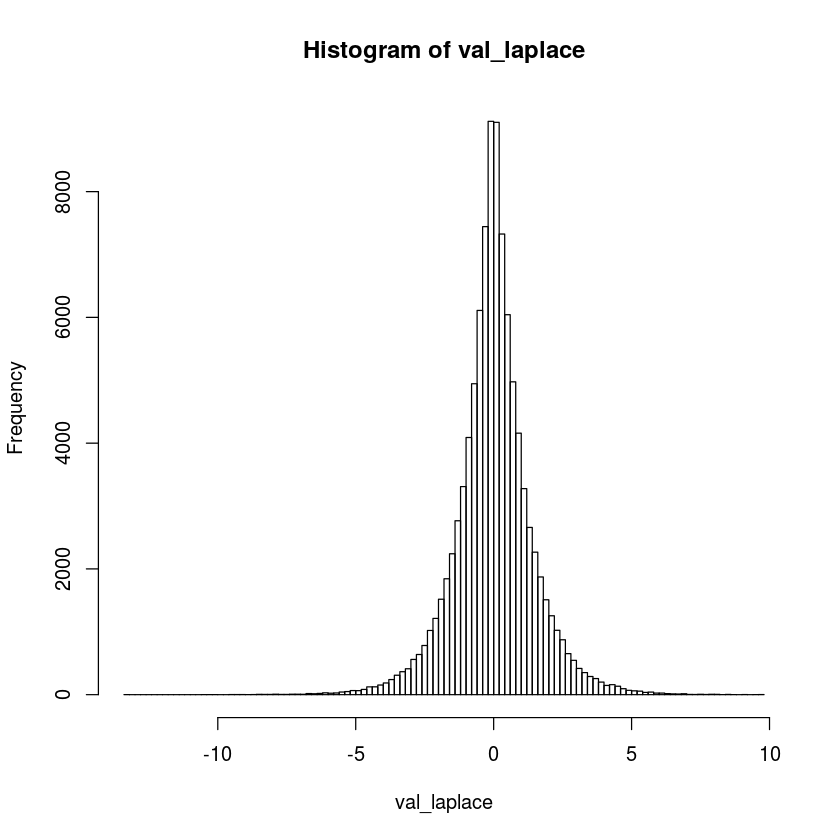

In [49]:
# Histograme des valeurs obtenues avec my_rlaplace
hist(val_laplace, breaks = 100)

#### Question 4
m = sqrt(2*exp(1) / Pi)

In [141]:
# methode de rejet
m = sqrt(2*exp(1)/pi)
my_rnorm <- function(n){
    xi = my_rlaplace(n)
    ui = runif(n)
    return(xi[which(ui <= dnorm(xi)/(m*my_dlaplace(xi)))])
}


In [148]:
# taux de rejet calculé
length(my_rnorm(10000))/10000

[1] 0.7617

In [149]:
# taux de rejet attendu
1/m

[1] 0.7601735